In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

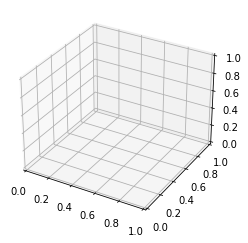

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# 3D scatter

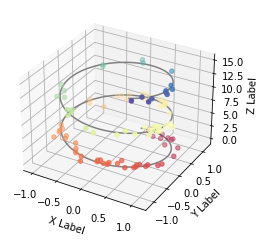

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='Spectral');
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Spectral') also works

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 3D surface plot

In [13]:
#3d Surface plot
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

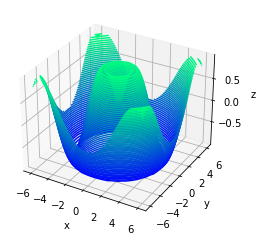

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='winter')   #cmap link: https://matplotlib.org/stable/gallery/color/colormap_reference.html
#binary,summer,afmhot, gist_heat, copper
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

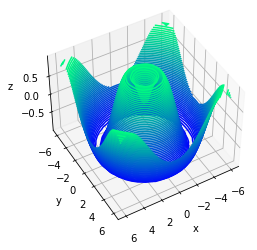

In [16]:
ax.view_init(45, 60)
fig

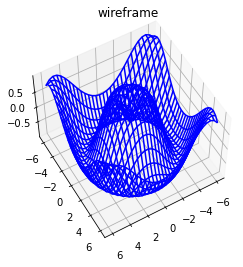

In [17]:
#wire_frame
fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.view_init(55, 60)
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe');

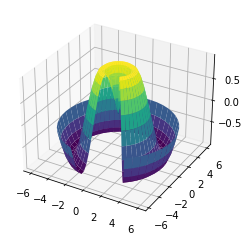

In [21]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

# box plot

In [18]:
import itertools as it

maxScatter = 200

In [19]:
sampleCount=int(input("Number of samples:"))
level1Count=int(input("Top Level Unique Values:"))
level2Count=int(input("Second Level Unique Values:"))

Number of samples: 200
Top Level Unique Values: 50
Second Level Unique Values: 50


In [20]:
level1 = ["Level1-{}".format(i) for i in range(level1Count)]
level2 = ["Level2-{}".format(i) for i in range(level2Count)]

In [32]:
import random
def genRandomChoice(l, size):
    for _ in range(size):
        yield random.choice(l)
def genRandInt(s,e,size):
    for _ in range(size):
        yield random.randint(s,e)
querytime = pd.DataFrame({'level1':list(genRandomChoice(level1,sampleCount)),
                          'level2':list(genRandomChoice(level2,sampleCount)),
                          'responseMS':list(genRandInt(5,100,sampleCount))})

In [33]:
querytime.sample(3)

,level1,level2,responseMS
80,Level1-6,Level2-45,35
39,Level1-28,Level2-13,62
41,Level1-23,Level2-9,84


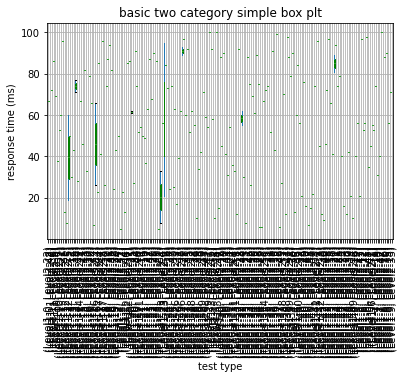

In [34]:
querytime.boxplot(by=['level1','level2'],rot=90,boxprops=dict(color='green'))
plt.title("basic two category simple box plt")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

# map

In [37]:
import folium
#

In [44]:
map1 = folium.Map(
    location=[27.467169, 89.636982],  
    zoom_start=15)

folium.Marker(
    location=[27.470038, 89.639936],
    popup='Clock Tower',
    icon=folium.Icon(icon='cloud')
).add_to(map1)

folium.Marker(
    location=[27.466354, 89.638089],
    popup='Memorial chorten',
    icon=folium.Icon(color='green')
).add_to(map1)

folium.Marker(
    location=[27.462391, 89.638539],
    popup='Falculty of Nursing and Public Health',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(map1)

folium.Marker(
    location=[27.464651, 89.639824],
    popup='RBP headquarter',
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(map1)


map1

# Clustering

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [46]:
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40


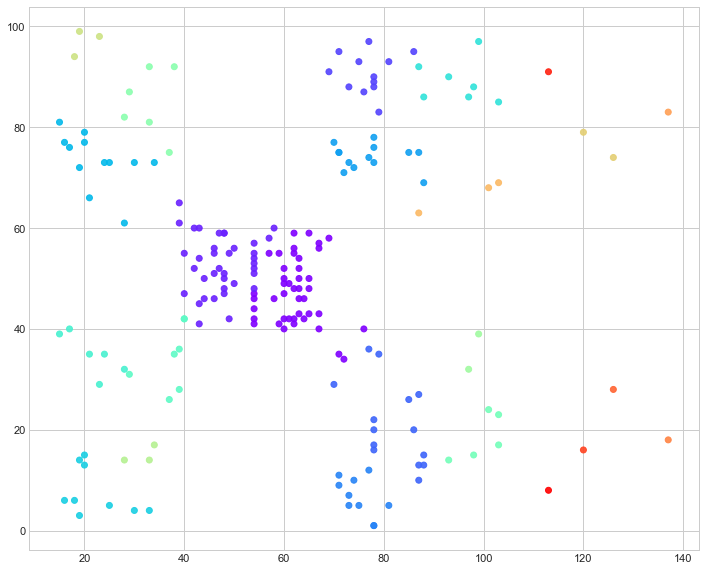

In [47]:
from sklearn.cluster import MeanShift     #clustering methods: https://scikit-learn.org/stable/modules/clustering.html
model = MeanShift(bandwidth=10)
model.fit(data)
pred = model.fit_predict(data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

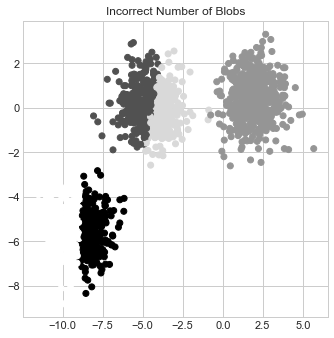

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
#X=data["Income"]
#y=data["Spending"]
n_clus=5
# Incorrect number of clusters
y_pred = KMeans(n_clusters=n_clus, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


plt.show()

In [52]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(3, affinity='precomputed', n_init=100,
                          assign_labels='discretize')
model.fit(adjacency_matrix)
pred = model.fit_predict(data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

NameError: name 'adjacency_matrix' is not defined